### Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load Dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Danazzz/beras-scm/main/csv/Beras.csv")
df

,Tanggal,Luas Panen Padi,GKP Tingkat Petani,GKP Tingkat Penggilingan,GKG Tingkat Penggilingan,Harga Beras Penggilingan,Produksi Beras,Harga Beras,UMP,BBM Solar,Tingkat Konsumsi
0,2021-03-15,10,4000,4150,5050,9465,14419,11200,4960,9600,17161
1,2021-03-16,10,3850,4100,4740,9360,14419,11200,4960,9600,17161
2,2021-03-17,10,4160,4230,4950,9400,14419,11200,4960,9600,17161
3,2021-03-18,10,4120,4190,4730,9340,14419,11200,4960,9600,17161
4,2021-03-19,10,4190,4290,4990,9410,14419,11200,4960,9600,17161
...,...,...,...,...,...,...,...,...,...,...,...
673,2023-12-21,30,6770,6850,7980,13100,14391,14000,5444,6800,17598
674,2023-12-22,30,6600,6760,8050,13095,14391,14000,5444,6800,17598
675,2023-12-27,30,6620,6760,8030,13120,14391,14000,5444,6800,17598
676,2023-12-28,30,6650,6760,8020,13120,14391,14000,5444,6800,17598


### Preprocessing

In [ ]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df['Year'] = df['Tanggal'].dt.year
df['Month'] = df['Tanggal'].dt.month

In [ ]:
df = df.set_index('Tanggal')
df = df[['Harga Beras']]
df.head()

,Harga Beras
Tanggal,
2021-03-15,11200
2021-03-16,11200
2021-03-17,11200
2021-03-18,11200
2021-03-19,11200


In [ ]:
from sklearn.preprocessing import MinMaxScaler
#normalize
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
#split data
train_size = int(len(df_scaled) * 0.8)
train_data, test_data = df_scaled[:train_size], df_scaled[train_size:]


In [ ]:
def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range (len(data) - sequence_length):
        x.append(data[i:(i + sequence_length), 0])
        y.append(data[i + sequence_length, 0])
    return np.array(x), np.array(y)
sequence_length = 10
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=150, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss ='mean_squared_error')
model.fit(X_train, y_train, epochs=15, batch_size=64)

Epoch 1/15
9/9 [==============================] - 8s 29ms/step - loss: 0.0180
Epoch 2/15
9/9 [==============================] - 0s 30ms/step - loss: 0.0029
Epoch 3/15
9/9 [==============================] - 0s 30ms/step - loss: 0.0013
Epoch 4/15
9/9 [==============================] - 0s 28ms/step - loss: 6.7267e-04
Epoch 5/15
9/9 [==============================] - 0s 28ms/step - loss: 5.9475e-04
Epoch 6/15
9/9 [==============================] - 0s 32ms/step - loss: 4.5268e-04
Epoch 7/15
9/9 [==============================] - 0s 30ms/step - loss: 4.4562e-04
Epoch 8/15
9/9 [==============================] - 0s 28ms/step - loss: 3.9380e-04
Epoch 9/15
9/9 [==============================] - 0s 29ms/step - loss: 3.9587e-04
Epoch 10/15
9/9 [==============================] - 0s 31ms/step - loss: 3.9071e-04
Epoch 11/15
9/9 [==============================] - 0s 29ms/step - loss: 3.8886e-04
Epoch 12/15
9/9 [==============================] - 0s 31ms/step - loss: 3.8547e-04
Epoch 13/15
9/9 [========

4/4 [==============================] - 1s 8ms/step
Mean Squared Error: 36327.65696206169


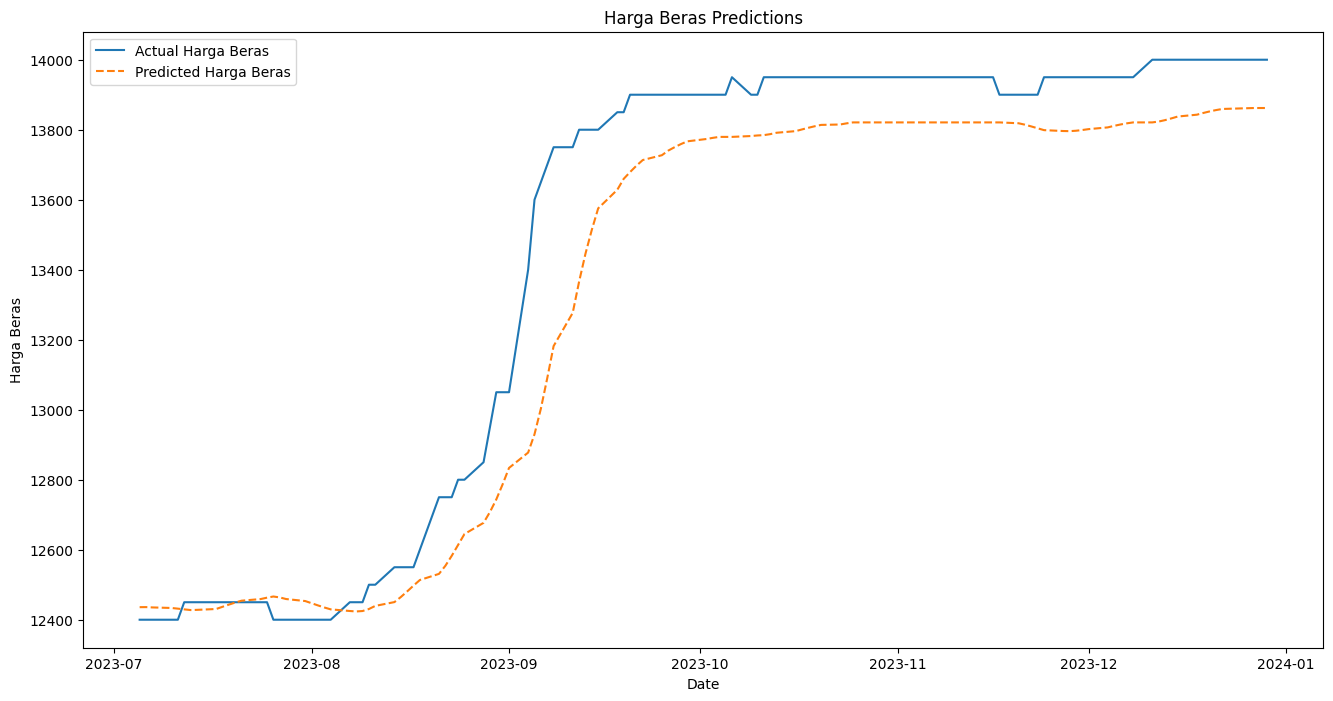

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df[-len(predictions):]["Harga Beras"], predictions)
print(f'Mean Squared Error: {mse}')
#plot
plt.figure(figsize=(16,8))
plt.plot(df.index[-len(predictions):], df[-len(predictions):]["Harga Beras"], label = "Actual Harga Beras")
plt.plot(df.index[-len(predictions):], predictions, label = "Predicted Harga Beras", linestyle='dashed')
plt.title('Harga Beras Predictions')
plt.xlabel('Date')
plt.ylabel('Harga Beras')
plt.legend()
plt.show()

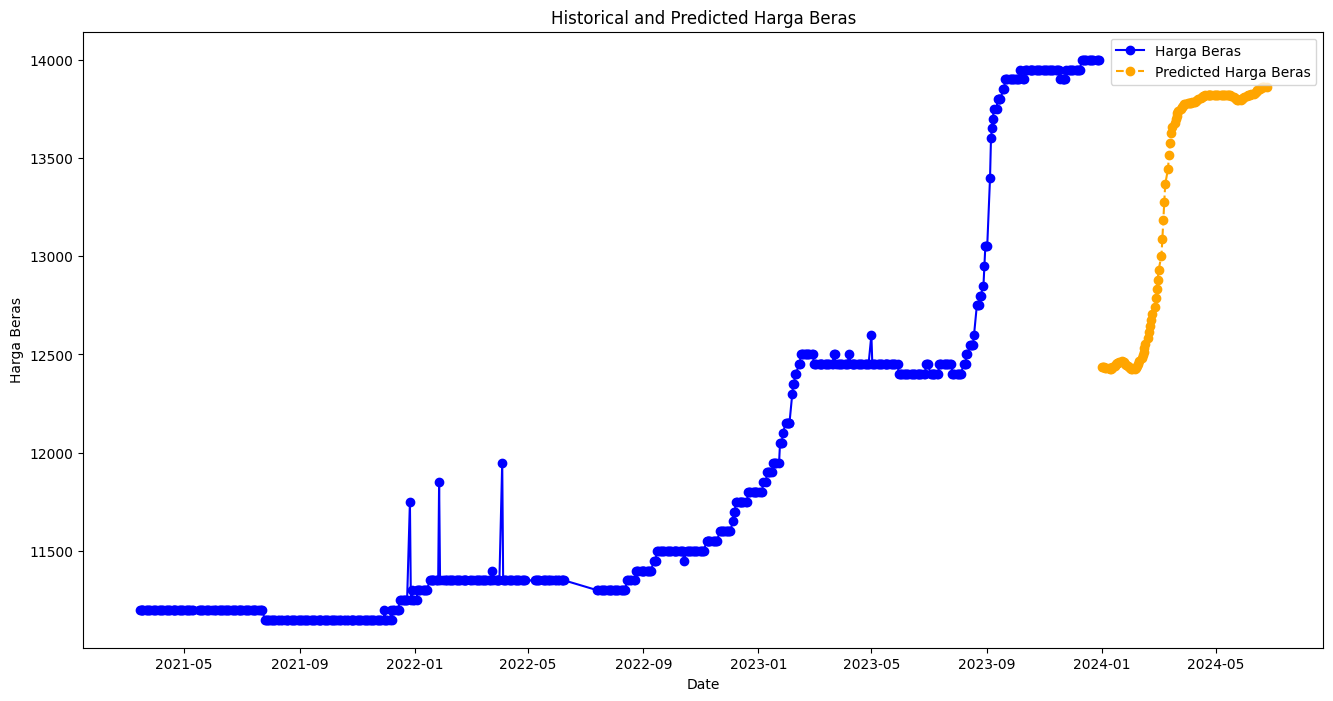

In [ ]:
Beras_column = 'Harga Beras'

plt.figure(figsize=(16,8))
plt.plot(df.index, df[Beras_column], label='Harga Beras', marker='o', linestyle='-', color='b')

predicted_dates = pd.date_range(start=df.index[-1], periods=len(predictions)+1, freq='B')[1:]
plt.plot(predicted_dates, predictions, label='Predicted Harga Beras', marker='o', linestyle='dashed', color='orange')
plt.title('Historical and Predicted Harga Beras')
plt.xlabel('Date')
plt.ylabel('Harga Beras')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

rmse = sqrt(mean_squared_error(df[-len(predictions):]["Harga Beras"], predictions))
mae = mean_absolute_error(df[-len(predictions):]["Harga Beras"], predictions)
print("Root Mean Square Error:", rmse)
print("Mean Absolute Error:", mae)

# R Square
r = r2_score(df[-len(predictions):]["Harga Beras"], predictions)

# Mean Square Error
mse = mean_squared_error(df[-len(predictions):]["Harga Beras"], predictions)

# Menampilkan hasil
print("R Square: {:.4f}".format(r))
print("Mean Square Error:", mse)

Root Mean Square Error: 190.59815571526838
Mean Absolute Error: 147.59119233630952
R Square: 0.9170
Mean Square Error: 36327.65696206169
